In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,BatchNormalization,Input,Flatten
from sklearn.preprocessing import MinMaxScaler 

In [4]:
def split(feature,target): 
    df = pd.read_csv('./samsung.csv', thousands = ',')
    #df.head()
    df = df.rename(columns = { '시가': 'market','고가':'high','저가':'low','종가':'end','거래량':'volumn'})
    df = df.dropna().loc[::-1].reset_index(drop=True)
    del df['일자']
    df = df.astype('int64')
    x = np.empty((1,5), dtype=int) 
    y = np.array(df[target])
    for i in range(len(df)-feature+1):
        for j in range(feature):
            x = np.append(x,np.array(df.loc[i+j]).reshape(1,5),axis=0) 
    return x[1:,:].reshape(-1,feature,5) , y[feature:]

In [12]:
feature = 5
target = 'end'
x_train,y_train = split(feature,target) 

(571, 5, 5)

In [13]:
 
sc = MinMaxScaler()  
x_test = x_train[450:,:,:]
x_train = x_train[:450,:,:]
x_pre = x_test[-1,:,:]
x_test = x_test[:-1,:,:]
y_test = y_train[450:]
y_train = y_train[:450]

x_train = sc.fit_transform(x_train.reshape(-1,feature*5)).reshape(-1,feature,5) 
x_test = sc.transform(x_test.reshape(-1,feature*5)).reshape(-1,feature,5) 
x_pre = sc.transform(x_pre.reshape(-1,feature*5)).reshape(-1,feature,5)  

In [14]:
x_train.shape, y_train.shape,x_test.shape ,y_test.shape, x_pre.shape

((450, 5, 5), (450,), (120, 5, 5), (120,), (1, 5, 5))

In [27]:
inputs = Input(shape=(feature,5))
z = Dense(30,activation='selu')(inputs)
z = BatchNormalization()(z)
z = Dense(64,activation='selu')(z)
z = BatchNormalization()(z)
z = Dense(128,activation='selu')(z)
z = BatchNormalization()(z)
z = Dense(64,activation='selu')(z)
z = BatchNormalization()(z)
z = Dense(32,activation='selu')(z)
z = BatchNormalization()(z)
z = Dense(16,activation='selu')(z)
z = Flatten()(z)
z = Dense(5,activation='selu')(z)
z = Dense(1)(z)

model = Model(inputs=inputs,outputs=z)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 5, 5)]            0         
_________________________________________________________________
dense_16 (Dense)             (None, 5, 30)             180       
_________________________________________________________________
batch_normalization_10 (Batc (None, 5, 30)             120       
_________________________________________________________________
dense_17 (Dense)             (None, 5, 64)             1984      
_________________________________________________________________
batch_normalization_11 (Batc (None, 5, 64)             256       
_________________________________________________________________
dense_18 (Dense)             (None, 5, 128)            8320      
_________________________________________________________________
batch_normalization_12 (Batc (None, 5, 128)            512 

In [28]:

model.compile(loss='mse',
                  optimizer='nadam')
model.fit( x_train ,  y_train , batch_size=15,  epochs=600)

Epoch 1/600
30/30 [==============================] - 0s 5ms/step - loss: 2272083200.0000
Epoch 2/600
30/30 [==============================] - 0s 6ms/step - loss: 2270667264.0000
Epoch 3/600
30/30 [==============================] - 0s 7ms/step - loss: 2267748864.0000
Epoch 4/600
30/30 [==============================] - 0s 7ms/step - loss: 2262260224.0000
Epoch 5/600
30/30 [==============================] - 0s 7ms/step - loss: 2253040640.0000
Epoch 6/600
30/30 [==============================] - 0s 7ms/step - loss: 2238250496.0000
Epoch 7/600
30/30 [==============================] - 0s 7ms/step - loss: 2215925504.0000
Epoch 8/600
30/30 [==============================] - 0s 7ms/step - loss: 2184171776.0000
Epoch 9/600
30/30 [==============================] - 0s 6ms/step - loss: 2139792256.0000
Epoch 10/600
30/30 [==============================] - 0s 6ms/step - loss: 2082965760.0000
Epoch 11/600
30/30 [==============================] - 0s 7ms/step - loss: 2010126720.0000
Epoch 12/600
30/30 

Epoch 94/600
30/30 [==============================] - 0s 7ms/step - loss: 6609378.5000
Epoch 95/600
30/30 [==============================] - 0s 8ms/step - loss: 6658274.0000
Epoch 96/600
30/30 [==============================] - 0s 7ms/step - loss: 9078640.0000
Epoch 97/600
30/30 [==============================] - 0s 7ms/step - loss: 6834663.0000
Epoch 98/600
30/30 [==============================] - 0s 7ms/step - loss: 8641073.0000
Epoch 99/600
30/30 [==============================] - 0s 7ms/step - loss: 8045837.0000
Epoch 100/600
30/30 [==============================] - 0s 7ms/step - loss: 6995811.0000
Epoch 101/600
30/30 [==============================] - 0s 6ms/step - loss: 7612313.5000
Epoch 102/600
30/30 [==============================] - 0s 7ms/step - loss: 7729081.5000
Epoch 103/600
30/30 [==============================] - 0s 7ms/step - loss: 8372843.5000
Epoch 104/600
30/30 [==============================] - 0s 7ms/step - loss: 7615235.5000
Epoch 105/600
30/30 [=================

30/30 [==============================] - 0s 6ms/step - loss: 3469415.0000
Epoch 187/600
30/30 [==============================] - 0s 7ms/step - loss: 3151783.5000
Epoch 188/600
30/30 [==============================] - 0s 6ms/step - loss: 2500176.7500
Epoch 189/600
30/30 [==============================] - 0s 4ms/step - loss: 3626693.0000
Epoch 190/600
30/30 [==============================] - 0s 5ms/step - loss: 3283368.5000
Epoch 191/600
30/30 [==============================] - 0s 4ms/step - loss: 2915117.5000
Epoch 192/600
30/30 [==============================] - 0s 5ms/step - loss: 2496768.5000
Epoch 193/600
30/30 [==============================] - 0s 4ms/step - loss: 2638134.0000
Epoch 194/600
30/30 [==============================] - 0s 5ms/step - loss: 2446517.0000
Epoch 195/600
30/30 [==============================] - 0s 5ms/step - loss: 2719266.2500
Epoch 196/600
30/30 [==============================] - 0s 6ms/step - loss: 3516305.7500
Epoch 197/600
30/30 [=========================

30/30 [==============================] - 0s 6ms/step - loss: 2803661.0000
Epoch 280/600
30/30 [==============================] - 0s 5ms/step - loss: 2176714.5000
Epoch 281/600
30/30 [==============================] - 0s 5ms/step - loss: 2518057.0000
Epoch 282/600
30/30 [==============================] - 0s 5ms/step - loss: 2220559.2500
Epoch 283/600
30/30 [==============================] - 0s 6ms/step - loss: 2393203.7500
Epoch 284/600
30/30 [==============================] - 0s 6ms/step - loss: 2285081.2500
Epoch 285/600
30/30 [==============================] - 0s 5ms/step - loss: 2421816.5000
Epoch 286/600
30/30 [==============================] - 0s 5ms/step - loss: 2164697.0000
Epoch 287/600
30/30 [==============================] - 0s 7ms/step - loss: 1908227.2500
Epoch 288/600
30/30 [==============================] - 0s 6ms/step - loss: 2130981.5000
Epoch 289/600
30/30 [==============================] - 0s 5ms/step - loss: 2364479.5000
Epoch 290/600
30/30 [=========================

Epoch 372/600
30/30 [==============================] - 0s 6ms/step - loss: 1802034.6250
Epoch 373/600
30/30 [==============================] - 0s 5ms/step - loss: 1547497.2500
Epoch 374/600
30/30 [==============================] - 0s 5ms/step - loss: 1654653.6250
Epoch 375/600
30/30 [==============================] - 0s 6ms/step - loss: 1668237.3750
Epoch 376/600
30/30 [==============================] - 0s 5ms/step - loss: 1458638.7500
Epoch 377/600
30/30 [==============================] - 0s 5ms/step - loss: 1763216.6250
Epoch 378/600
30/30 [==============================] - 0s 5ms/step - loss: 1767766.0000
Epoch 379/600
30/30 [==============================] - 0s 5ms/step - loss: 1741395.8750
Epoch 380/600
30/30 [==============================] - 0s 5ms/step - loss: 1407315.2500
Epoch 381/600
30/30 [==============================] - 0s 5ms/step - loss: 1643902.0000
Epoch 382/600
30/30 [==============================] - 0s 6ms/step - loss: 1796691.5000
Epoch 383/600
30/30 [===========

30/30 [==============================] - 0s 5ms/step - loss: 1078471.5000
Epoch 466/600
30/30 [==============================] - 0s 5ms/step - loss: 1220644.5000
Epoch 467/600
30/30 [==============================] - 0s 5ms/step - loss: 1407345.8750
Epoch 468/600
30/30 [==============================] - 0s 5ms/step - loss: 1349359.5000
Epoch 469/600
30/30 [==============================] - 0s 5ms/step - loss: 1435227.7500
Epoch 470/600
30/30 [==============================] - 0s 5ms/step - loss: 1375035.8750
Epoch 471/600
30/30 [==============================] - 0s 5ms/step - loss: 1210116.5000
Epoch 472/600
30/30 [==============================] - 0s 5ms/step - loss: 1277788.6250
Epoch 473/600
30/30 [==============================] - 0s 6ms/step - loss: 1445795.5000
Epoch 474/600
30/30 [==============================] - 0s 6ms/step - loss: 1237946.5000
Epoch 475/600
30/30 [==============================] - 0s 5ms/step - loss: 1157561.6250
Epoch 476/600
30/30 [=========================

30/30 [==============================] - 0s 5ms/step - loss: 1220894.7500
Epoch 559/600
30/30 [==============================] - 0s 5ms/step - loss: 1185859.5000
Epoch 560/600
30/30 [==============================] - 0s 5ms/step - loss: 1138979.7500
Epoch 561/600
30/30 [==============================] - 0s 6ms/step - loss: 1124681.7500
Epoch 562/600
30/30 [==============================] - 0s 7ms/step - loss: 1221829.8750
Epoch 563/600
30/30 [==============================] - 0s 7ms/step - loss: 1042155.4375
Epoch 564/600
30/30 [==============================] - 0s 6ms/step - loss: 1066824.6250
Epoch 565/600
30/30 [==============================] - 0s 6ms/step - loss: 1325651.3750
Epoch 566/600
30/30 [==============================] - 0s 5ms/step - loss: 1140407.3750
Epoch 567/600
30/30 [==============================] - 0s 6ms/step - loss: 958332.1875
Epoch 568/600
30/30 [==============================] - 0s 6ms/step - loss: 1040791.8750
Epoch 569/600
30/30 [==========================

In [29]:

predictions = model.predict(x_pre) 
print(f"tomorrow's Predicted {target} Price: {int(predictions)}")

tomorrow's Predicted end Price: 56323


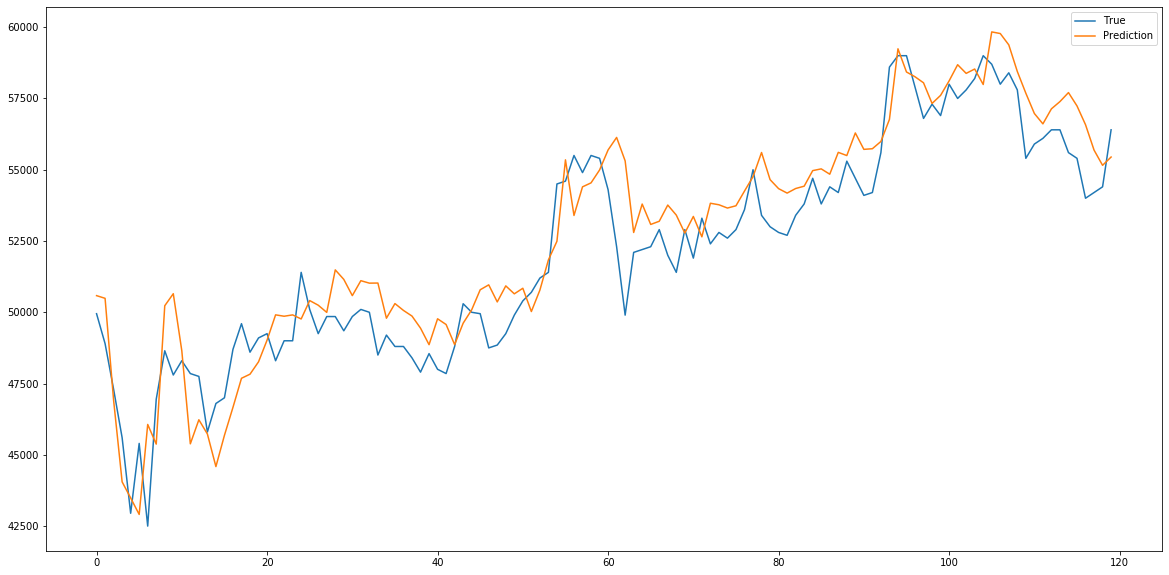

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(model.predict(x_test), label='Prediction')
ax.legend()
plt.show()